In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

In [3]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
import pygraphviz as pgv

from IPython.display import Image
def draw(A):
    return Image(A.draw(format='png', prog='dot'))

In [4]:
import sys
from pathlib import Path
home = str(Path.home())

sys.path.insert(0,"%s/rankability_toolbox_dev"%home)

In [5]:
import pyrankability

In [6]:
D1999 = pd.read_csv(home+'/college_football_analysis/data/ACC/1999.csv',header=None)
D1999

,0,1,2,3,4,5,6,7,8
0,0,1,0,0,1,0,1,1,1
1,0,0,0,0,1,0,0,1,1
2,1,1,0,1,1,1,1,1,1
3,1,1,0,0,1,1,1,0,0
4,0,0,0,0,0,0,1,0,1
5,1,1,0,0,1,0,0,0,0
6,0,1,0,0,0,1,0,0,0
7,0,0,0,1,1,1,1,0,1
8,0,0,0,1,0,1,1,0,0


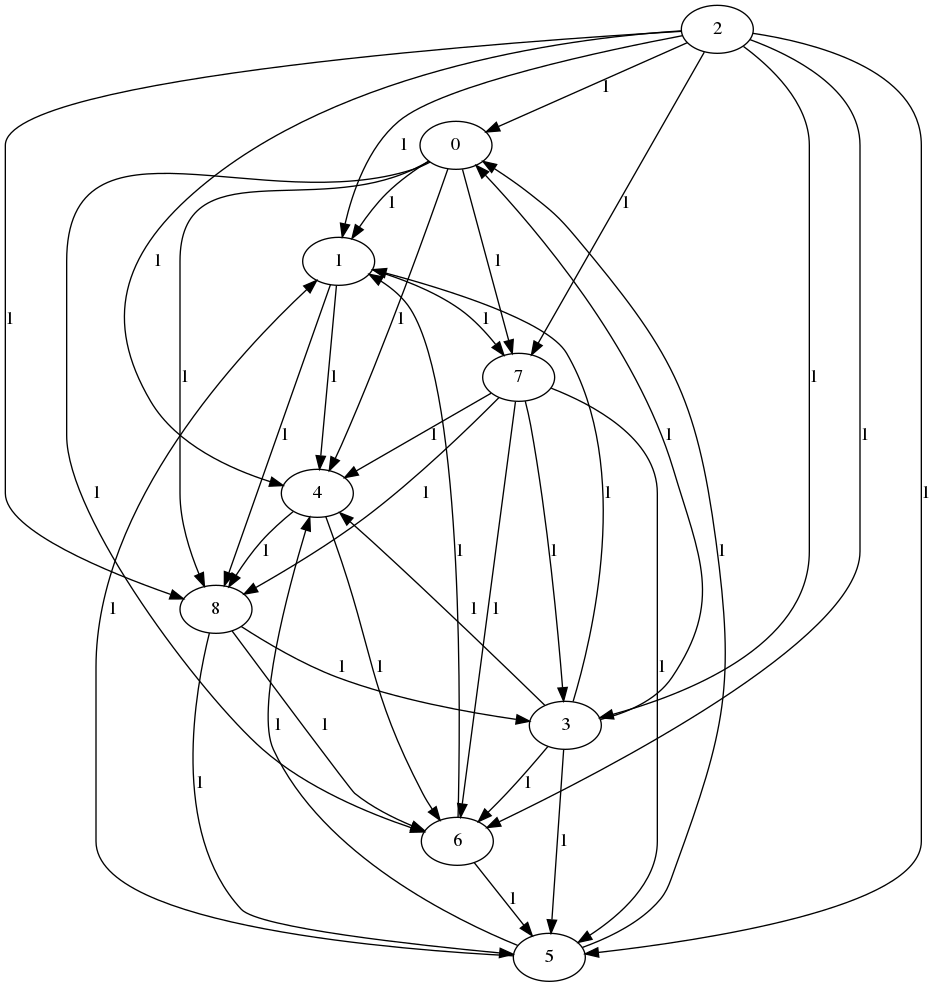

In [7]:
pyrankability.plot.D_as_graph(D1999,file='D1999_graph.png')

## Hillside BILP

In [8]:
D1999

,0,1,2,3,4,5,6,7,8
0,0,1,0,0,1,0,1,1,1
1,0,0,0,0,1,0,0,1,1
2,1,1,0,1,1,1,1,1,1
3,1,1,0,0,1,1,1,0,0
4,0,0,0,0,0,0,1,0,1
5,1,1,0,0,1,0,0,0,0
6,0,1,0,0,0,1,0,0,0
7,0,0,0,1,1,1,1,0,1
8,0,0,0,1,0,1,1,0,0


In [9]:
k,details = pyrankability.rank.solve(D1999,method='hillside',cont=False)
k

Using license file /home/jupyter-pander14/gurobi.lic
Academic license - for non-commercial use only - expires 2021-02-06


72

In [10]:
perm = np.array(details['P'][0])
np.sum(np.triu(pyrankability.construct.C_count(D1999).values[perm,:][:,perm]))

72.0

In [11]:
D1999.iloc[perm,:].iloc[:,perm]

,2,7,3,0,8,5,1,6,4
2,0,1,1,1,1,1,1,1,1
7,0,0,1,0,1,1,0,1,1
3,0,0,0,1,0,1,1,1,1
0,0,1,0,0,1,0,1,1,1
8,0,0,1,0,0,1,0,1,0
5,0,0,0,1,0,0,1,0,1
1,0,1,0,0,1,0,0,0,1
6,0,0,0,0,0,1,1,0,0
4,0,0,0,0,1,0,0,1,0


In [12]:
np.tril(pyrankability.construct.C_count(D1999).values[perm,:][:,perm])

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 6.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 6.,  4.,  4.,  0.,  0.,  0.,  0.,  0.,  0.],
       [10.,  4.,  6.,  8.,  0.,  0.,  0.,  0.,  0.],
       [10.,  8.,  4.,  6.,  6.,  0.,  0.,  0.,  0.],
       [10.,  6.,  8.,  4.,  6.,  4.,  0.,  0.,  0.],
       [12.,  8.,  6.,  8.,  4.,  4.,  6.,  0.,  0.],
       [12.,  6.,  8.,  6.,  4.,  6.,  4.,  4.,  0.]])

### One solution

In [14]:
pd.Series(details['P'][0])

0    2
1    7
2    3
3    0
4    8
5    5
6    1
7    6
8    4
dtype: int64

In [15]:
pd.DataFrame(details['x'])

,0,1,2,3,4,5,6,7,8
0,0,1,0,0,1,1,1,0,1
1,0,0,0,0,1,0,1,0,0
2,1,1,0,1,1,1,1,1,1
3,1,1,0,0,1,1,1,0,1
4,0,0,0,0,0,0,0,0,0
5,0,1,0,0,1,0,1,0,0
6,0,0,0,0,1,0,0,0,0
7,1,1,0,1,1,1,1,0,1
8,0,1,0,0,1,1,1,0,0


## LOP LP

In [63]:
k,details_lop = pyrankability.rank.solve(D1999,method='lop',cont=True)
k

9

In [64]:
pd.DataFrame(pyrankability.common.threshold_x(details_lop['x']))

,0,1,2,3,4,5,6,7,8
0,0.000000,1.000000,0.0,0.357096,1.000000,0.626943,1.000000,0.741163,1.000000
1,0.000000,0.000000,0.0,0.000000,1.000000,0.269847,0.642904,0.384067,0.642904
2,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.642904,1.000000,0.0,0.000000,1.000000,1.000000,1.000000,0.384067,0.642904
4,0.000000,0.000000,0.0,0.000000,0.000000,0.269847,0.642904,0.000000,0.642904
5,0.373057,0.730153,0.0,0.000000,0.730153,0.000000,0.373057,0.114220,0.373057
6,0.000000,0.357096,0.0,0.000000,0.357096,0.626943,0.000000,0.000000,0.000000
7,0.258837,0.615933,0.0,0.615933,1.000000,0.885780,1.000000,0.000000,1.000000
8,0.000000,0.357096,0.0,0.357096,0.357096,0.626943,1.000000,0.000000,0.000000


In [55]:
indices = details['indices']

In [56]:
label = "A"
xstars = {}
indices = {}
details_cont = {}
details_cont['lop'] = details
for method in details_cont.keys():
    details = details_cont[method]
    xstar = pd.DataFrame(details['x'],index=D1999.index,columns=D1999.columns)
    xstars["%s. %s"%(label,method)] = xstar
    indices["%s. %s"%(label,method)] = details['indices']
    label = chr(ord(label)+1)
g,score_df,ordered_xstars = pyrankability.plot.show_score_xstar2(xstars,
                                                                 group_label="Group",width=300,height=300,
                                                                 columns=2,resolve_scale=True)
g

alt.FacetChart(...)

In [17]:
delta_lop_with_models,details_lop_with_models = pyrankability.rank.solve(D1999,method='lop',cont=False,include_model=True)

In [18]:
model = details_lop_with_models['model']
model_file = pyrankability.common.write_model(model)
solution_file = model_file + ".solutions"
model_file

'/tmp/tmp0vjk5az5/model.mps'

In [19]:
!sed -i '/^OBJSENS/d' $model_file

In [20]:
%%timeit
%%bash -s "$model_file" "$solution_file"
~/rankability_toolbox_dev/collect.sh $1 $2

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmp0vjk5az5/model.mps
Solutions file: /tmp/tmp0vjk5az5/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

87 ms ± 1.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
D = D1999

In [42]:
opt_k = details_lop_with_models['obj']

solutions = pd.read_csv(solution_file,sep=', ')
x_columns = solutions.columns[1:-1]
xs = []
a,b,c = 1,1,-2*len(x_columns)
n = int((-b + np.sqrt(b**2 - 4*a*c))/(2*a) + 1)
xstar = np.zeros((n,n))
objs = []
s = 0
for k in range(solutions.shape[0]):
    x = np.zeros((n,n))
    for c in x_columns:
        ij_str = c.replace("x(","").replace(")","")
        i,j = ij_str.split(",")
        i,j = int(i),int(j)
        x[i,j] = solutions.loc[k,c]
        x[j,i] = 1 - x[i,j]
    obj = np.sum(np.sum(D*x))
    xs.append(x)
    objs.append(obj)
    error = obj - opt_k
    xstar += x
xstar = xstar/solutions.shape[0]
pd.DataFrame(xstar)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3,4,5,6,7,8
0,0.00,1.00,0.0,0.25,1.00,0.50,1.00,0.75,1.00
1,0.00,0.00,0.0,0.00,1.00,0.25,0.75,0.50,0.75
2,1.00,1.00,0.0,1.00,1.00,1.00,1.00,1.00,1.00
3,0.75,1.00,0.0,0.00,1.00,1.00,1.00,0.50,0.75
4,0.00,0.00,0.0,0.00,0.00,0.25,0.75,0.00,0.75
5,0.50,0.75,0.0,0.00,0.75,0.00,0.50,0.25,0.50
6,0.00,0.25,0.0,0.00,0.25,0.50,0.00,0.00,0.00
7,0.25,0.50,0.0,0.50,1.00,0.75,1.00,0.00,1.00
8,0.00,0.25,0.0,0.25,0.25,0.50,1.00,0.00,0.00


In [74]:
xstar

,0,1,2,3,4,5,6,7,8
0,0.000000,1.000000,0.0,0.357096,1.000000,0.626943,1.000000,1.000000,1.000000
1,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.642904,0.384067,0.642904
2,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.642904,1.000000,0.0,0.000000,1.000000,1.000000,1.000000,0.384067,0.642904
4,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.642904,0.000000,0.642904
5,0.373057,1.000000,0.0,0.000000,1.000000,0.000000,0.373057,0.000000,0.373057
6,0.000000,0.357096,0.0,0.000000,0.357096,0.626943,0.000000,0.000000,0.000000
7,0.000000,0.615933,0.0,0.615933,1.000000,1.000000,1.000000,0.000000,1.000000
8,0.000000,0.357096,0.0,0.357096,0.357096,0.626943,1.000000,0.000000,0.000000


In [76]:
label = "A"
xstars = {}
indices = {}
details_cont = {}
details_cont['lop_xstar'] = details_lop
details_cont['lop_xf'] = {'x':xstar.values}
for method in details_cont.keys():
    details = details_cont[method]
    x = pyrankability.common.threshold_x(details['x'],lower_cut=0.3,upper_cut=0.7)
    xstar = pd.DataFrame(x,index=D1999.index,columns=D1999.columns)
    xstars["%s. %s"%(label,method)] = xstar
    indices["%s. %s"%(label,method)] = indices
    label = chr(ord(label)+1)
g,score_df,ordered_xstars = pyrankability.plot.show_score_xstar2(xstars,
                                                                 group_label="Group",width=300,height=300,
                                                                 columns=2,resolve_scale=True)
g

alt.FacetChart(...)

In [77]:
label = "A"
xstars = {}
indices = {}
details_cont = {}
details_cont['lop_xstar'] = details_lop
details_cont['lop_xf'] = {'x':xstar.values}
for method in details_cont.keys():
    details = details_cont[method]
    x = pyrankability.common.threshold_x(details['x'],lower_cut=0.3,upper_cut=0.7)
    xstar = pd.DataFrame(x,index=D1999.index,columns=D1999.columns)
    xstars["%s. %s"%(label,method)] = xstar
    indices["%s. %s"%(label,method)] = indices
    label = chr(ord(label)+1)
g,score_df,ordered_xstars = pyrankability.plot.show_score_xstar2(xstars,
                                                                 group_label="Group",width=300,height=300,
                                                                 columns=2,resolve_scale=True)
g

alt.FacetChart(...)

In [58]:
perms = []
for x in xs:
    r = np.sum(x,axis=0)
    perm = np.argsort(r)
    perms.append(perm+1)
perms

[array([3, 4, 1, 2, 8, 5, 9, 7, 6]),
 array([3, 1, 8, 9, 4, 7, 6, 2, 5]),
 array([3, 4, 6, 1, 2, 8, 5, 9, 7]),
 array([3, 8, 4, 6, 1, 2, 5, 9, 7])]

## Most distant pairs

In [18]:
k_two_distant,details_two_distant = pyrankability.search.solve_pair_max_tau(D1999,method='hillside',verbose=False)
details_two_distant['obj']

7.0

In [19]:
def calc_tau(n,obj):
    nchoose2 = pyrankability.common.nCr(n,2)
    tau = (nchoose2 - obj)/nchoose2
    return tau

In [20]:
calc_tau(len(D1999),details_two_distant['obj'])

0.8055555555555556

In [21]:
details_two_distant['perm_x']

(2, 0, 3, 7, 1, 5, 8, 6, 4)

In [22]:
details_two_distant['perm_y']

(2, 7, 3, 0, 8, 5, 1, 4, 6)

In [23]:
list(details_two_distant['perm_x'])

[2, 0, 3, 7, 1, 5, 8, 6, 4]

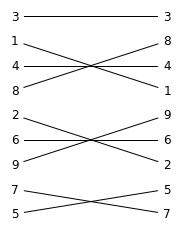

In [24]:
pyrankability.plot.spider(pyrankability.plot.AB_to_P2(1+np.array(details_two_distant['perm_x']),1+np.array(details_two_distant['perm_y'])),file="example_2_max_pair",width=3,height=4)

In [25]:
details_two_distant['obj']

7.0

## LOP

In [26]:
k,details = pyrankability.rank.solve(D1999,method='lop',cont=False)
k

6

In [27]:
pd.Series(details['P'][0])+1

0    3
1    8
2    4
3    6
4    1
5    2
6    5
7    9
8    7
dtype: int64

In [28]:
perm = np.array(details['P'][0])
Dre = D1999.iloc[perm,:].iloc[:,perm]
orig_siam_unweighted_k = sum(Dre.values[np.triu_indices(len(Dre),1)]==0)+sum(Dre.values[np.tril_indices(len(Dre))]==1)
orig_siam_unweighted_k

12

In [29]:
import itertools
min_P = np.Inf
P = []
for perm in itertools.permutations(range(len(D1999))):
    perm = np.array(perm)
    Dre = D1999.iloc[perm,:].iloc[:,perm]
    orig_siam_unweighted_k = sum(Dre.values[np.triu_indices(len(Dre),1)]==0)+sum(Dre.values[np.tril_indices(len(Dre))]==1)
    if orig_siam_unweighted_k < min_P:
        min_P = orig_siam_unweighted_k
        P = [perm]
    elif orig_siam_unweighted_k == min_P:
        P.append(perm)

### Original P set from SIMODS

In [30]:
min_P

12

In [31]:
(np.array(P)+1).T

array([[3, 3, 3, 3],
       [1, 4, 4, 8],
       [8, 1, 6, 4],
       [9, 2, 1, 6],
       [4, 8, 2, 1],
       [7, 5, 8, 2],
       [6, 9, 5, 5],
       [2, 7, 9, 9],
       [5, 6, 7, 7]])

### Here is LOP
All that changes is the objective function

In [47]:
import itertools
min_P = np.Inf
P = []
for perm in itertools.permutations(range(len(D1999))):
    perm = np.array(perm)
    Dre = D1999.iloc[perm,:].iloc[:,perm]
    lop_k = np.sum(np.tril(Dre))
    if lop_k < min_P:
        min_P = lop_k
        P = [perm]
    elif lop_k == min_P:
        P.append(perm)

In [48]:
min_P

6

In [49]:
(np.array(P)+1).T

array([[3, 3, 3, 3],
       [1, 4, 4, 8],
       [8, 1, 6, 4],
       [9, 2, 1, 6],
       [4, 8, 2, 1],
       [7, 5, 8, 2],
       [6, 9, 5, 5],
       [2, 7, 9, 9],
       [5, 6, 7, 7]])

### Now onto max pair

In [73]:
k_lop,details_lop = pyrankability.rank.solve(D1999,method='lop',cont=False)
k_lop

6

In [74]:
k_two_distant,details_two_distant = pyrankability.search.solve_pair_max_tau(D1999,method='lop',verbose=False,cont=False)
details_two_distant

{'obj': 12.0,
 'k_x': 30,
 'k_y': 30,
 'perm_x': (2, 0, 7, 8, 3, 6, 5, 1, 4),
 'perm_y': (2, 3, 5, 0, 1, 7, 4, 8, 6),
 'c1':    0  1  2  3  4  5  6  7  8
 0  0  1  0  0  1  0  1  1  1
 1  0  0  0  0  1  0  0  1  1
 2  1  1  0  1  1  1  1  1  1
 3  1  1  0  0  1  1  1  0  0
 4  0  0  0  0  0  0  1  0  1
 5  1  1  0  0  1  0  0  0  0
 6  0  1  0  0  0  1  0  0  0
 7  0  0  0  1  1  1  1  0  1
 8  0  0  0  1  0  1  1  0  0,
 'c2':    0  1  2  3  4  5  6  7  8
 0  0  1  0  0  1  0  1  1  1
 1  0  0  0  0  1  0  0  1  1
 2  1  1  0  1  1  1  1  1  1
 3  1  1  0  0  1  1  1  0  0
 4  0  0  0  0  0  0  1  0  1
 5  1  1  0  0  1  0  0  0  0
 6  0  1  0  0  0  1  0  0  0
 7  0  0  0  1  1  1  1  0  1
 8  0  0  0  1  0  1  1  0  0,
 'x': array([[0, 1, 0, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 1, 0, 0, 0, 0],
        [1, 1, 0, 1, 1, 1, 1, 1, 1],
        [0, 1, 0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 1, 0, 0, 0],
    

In [77]:
perm_paper = np.array([3,8,4,6,1,2,5,9,7])-1
np.sum(np.sum(np.tril(D1999.iloc[perm_paper,:].iloc[:,perm_paper])))

6

In [78]:
perm_x = np.array(details_two_distant['perm_x'])
np.sum(np.sum(np.tril(D1999.iloc[perm_x,:].iloc[:,perm_x])))

6

In [79]:
calc_tau(len(D1999),details_two_distant['obj'])

0.6666666666666666

In [80]:
np.array(details_two_distant['perm_x'])

array([2, 0, 7, 8, 3, 6, 5, 1, 4])

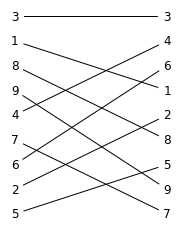

In [81]:
pyrankability.plot.spider(pyrankability.plot.AB_to_P2(1+np.array(details_two_distant['perm_x']),1+np.array(details_two_distant['perm_y'])),file="example_2_max_pair_lop",width=3,height=4)

### LOP LP

In [82]:
k,details = pyrankability.rank.solve(D1999,method='lop',cont=True)
k

9

In [83]:
pd.DataFrame(pyrankability.common.threshold_x(details['x']))

,0,1,2,3,4,5,6,7,8
0,0.000000,1.000000,0.0,0.357096,1.000000,0.626943,1.000000,0.741163,1.000000
1,0.000000,0.000000,0.0,0.000000,1.000000,0.269847,0.642904,0.384067,0.642904
2,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.642904,1.000000,0.0,0.000000,1.000000,1.000000,1.000000,0.384067,0.642904
4,0.000000,0.000000,0.0,0.000000,0.000000,0.269847,0.642904,0.000000,0.642904
5,0.373057,0.730153,0.0,0.000000,0.730153,0.000000,0.373057,0.114220,0.373057
6,0.000000,0.357096,0.0,0.000000,0.357096,0.626943,0.000000,0.000000,0.000000
7,0.258837,0.615933,0.0,0.615933,1.000000,0.885780,1.000000,0.000000,1.000000
8,0.000000,0.357096,0.0,0.357096,0.357096,0.626943,1.000000,0.000000,0.000000
